# Frequentist Inference Case Study - Part A

## An introduction to sampling from the normal distribution

In [1]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib.pyplot as plt
import seaborn as sns

Q1: Call up the documentation for the norm function imported above. What is the second listed method?

The second listed method is pdf(x, loc=0, scale=1) Probability density function.

Q2: Use the method that generates random variates to draw five samples from the standard normal distribution.

In [2]:
seed(47)
x = norm.rvs(loc=0, scale=1, size=5, random_state=None)

Q3: What is the mean of this sample? Is it exactly equal to the value you expected? Hint: the sample was drawn from the standard normal distribution. If you want a reminder of the properties of this distribution, check out p. 85 of AoS.

In [3]:
print('The mean is:', np.mean(x))

The mean is: 0.19355593334131074


In [4]:
# It was what I expected since we are only generating 5 samples 

Q4: What is the standard deviation of these numbers? Calculate this manually here as  ∑𝑖(𝑥𝑖−𝑥¯)2𝑛⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯⎯√  (This is just the definition of standard deviation given by Professor Spiegelhalter on p.403 of AoS). Hint: np.sqrt() and np.sum() will be useful here and remember that numPy supports broadcasting.

In [5]:
n = len(x)
difference = x - np.mean(x)
difference_square = difference ** 2
variance = np.sum(difference_square)
print('The standard deviation using this method is', np.sqrt(variance/n))

The standard deviation using this method is 0.9606195639478641


Q5: If all we had to go on was our five samples, what would be our best estimate of the population standard deviation? Use Bessel's correction ( 𝑛−1  in the denominator).

In [6]:
print('The standard deviation of the sample is', np.sqrt(variance/(n-1)))

The standard deviation of the sample is 1.0740053227518152


Q6: Now use numpy's std function to calculate the standard deviation of our random samples. Which of the above standard deviations did it return?

In [7]:
x_std = np.std(x)
print('Using np.std, the standard deviation is', x_std)

Using np.std, the standard deviation is 0.9606195639478641


In [8]:
#It returned the population standard deviation

Q7: Consult the documentation for np.std() to see how to apply the correction for estimating the population parameter and verify this produces the expected result.

numpy.std(a, axis=None, dtype=None, out=None, ddof=0, keepdims=<no value>)[source]
If, however, ddof is specified, the divisor N - ddof is used instead. 

In [9]:
print('By including the degree of freedom argument, the standard deviation is', np.std(x, ddof = 1))

By including the degree of freedom argument, the standard deviation is 1.0740053227518152


# Sampling Distributions

In [10]:
seed(47)
pop_heights = norm.rvs(172, 5, size=50000)

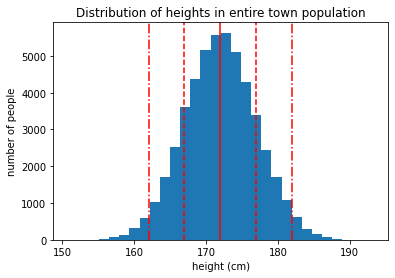

In [11]:
_ = plt.hist(pop_heights, bins=30)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in entire town population')
_ = plt.axvline(172, color='r')
_ = plt.axvline(172+5, color='r', linestyle='--')
_ = plt.axvline(172-5, color='r', linestyle='--')
_ = plt.axvline(172+10, color='r', linestyle='-.')
_ = plt.axvline(172-10, color='r', linestyle='-.')

Now, 50,000 people is rather a lot to chase after with a tape measure. If all you want to know is the average height of the townsfolk, then can you just go out and measure a sample to get a pretty good estimate of the average height?

In [12]:
def townsfolk_sampler(n):
    return np.random.choice(pop_heights, n)

In [13]:
# Let's say you go out one day and randomly sample 10 people to measure.
seed(47)
daily_sample1 = townsfolk_sampler(10)

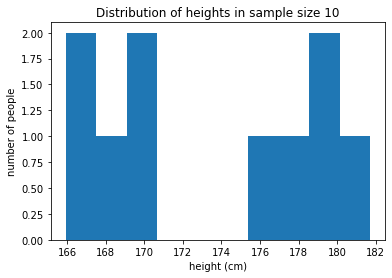

In [14]:
_ = plt.hist(daily_sample1, bins=10)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in sample size 10')

In [15]:
# The sample distribution doesn't resemble what we take the population distribution to be. What do we get for the mean?
np.mean(daily_sample1)

173.47911444163503

In [16]:
# And if we went out and repeated this experiment?
daily_sample2 = townsfolk_sampler(10)

In [17]:
np.mean(daily_sample2)

173.7317666636263

Q8: Simulate performing this random trial every day for a year, calculating the mean of each daily sample of 10, and plot the resultant sampling distribution of the mean.

In [18]:
#Start the for loop to repeat and add the mean of each day to an empty array
seed(47)
daily_sample_10 = np.empty(365)
for i in range(365):
    daily_sample_10[i] = np.mean(townsfolk_sampler(10))

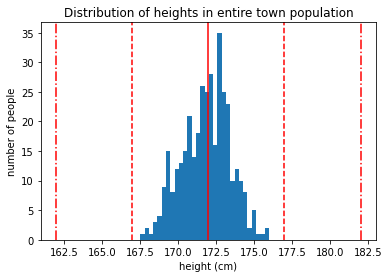

In [19]:
_ = plt.hist(daily_sample_10, bins=30)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in entire town population')
_ = plt.axvline(172, color='r')
_ = plt.axvline(172+5, color='r', linestyle='--')
_ = plt.axvline(172-5, color='r', linestyle='--')
_ = plt.axvline(172+10, color='r', linestyle='-.')
_ = plt.axvline(172-10, color='r', linestyle='-.')

Q9: Verify the above results from the CLT.

In [20]:
print('The mean of this sample is', np.mean(daily_sample_10))
print('The standard deviation is', np.std(daily_sample_10))

The mean of this sample is 171.8660049358649
The standard deviation is 1.5756704135286475


Q10: Repeat the above year's worth of samples but for a sample size of 50 (perhaps you had a bigger budget for conducting surveys that year)! Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT.

In [21]:
#Start the for loop to repeat and add the mean of each day to an empty array
seed(47)
daily_sample_50 = np.empty(365)
for i in range(365):
    daily_sample_50[i] = np.mean(townsfolk_sampler(50))

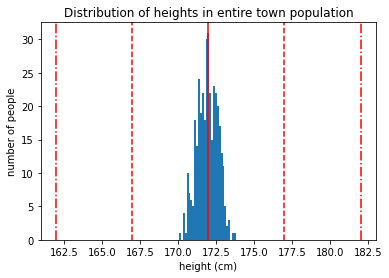

In [22]:
_ = plt.hist(daily_sample_50, bins=30)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in entire town population')
_ = plt.axvline(172, color='r')
_ = plt.axvline(172+5, color='r', linestyle='--')
_ = plt.axvline(172-5, color='r', linestyle='--')
_ = plt.axvline(172+10, color='r', linestyle='-.')
_ = plt.axvline(172-10, color='r', linestyle='-.')

In [23]:
'''As we can see on the picture, we see a narrower distribution'''

'As we can see on the picture, we see a narrower distribution'

In [24]:
print('The mean of this sample is', np.mean(daily_sample_50))
print('The standard deviation is', np.std(daily_sample_50))

The mean of this sample is 171.94366080916114
The standard deviation is 0.6736107539771146


Q11: Using this fact, calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution. Hint: you may find it helpful to sketch the standard normal distribution (the familiar bell shape) and mark the number of standard deviations from the mean on the x-axis and shade the regions of the curve that contain certain percentages of the population.

In [25]:
mean1 = np.mean(daily_sample_10)
std1 = np.std(daily_sample_10)
value1 = mean1 + std1
value2 = mean1 - std1

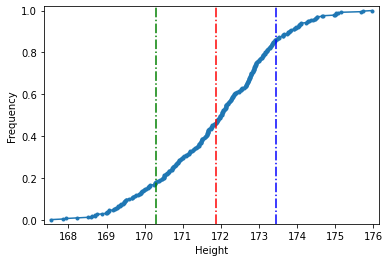

In [26]:
x = np.sort(daily_sample_10)
y = np.arange(1, len(x)+1)/len(x)
plt.plot(x, y, marker = '.', linestyle = None)
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.axvline(mean1, color='r', linestyle='-.')
plt.axvline(value1, color='blue', linestyle='-.')
plt.axvline(value2, color='green', linestyle='-.')
plt.margins(0.02)
plt.show()

In [27]:
#By looking the graph, we can conclude that the percentage within 1 std is:
print('The percentage of observations that are within 1 std is:', (0.84 - 0.16), 'approximately')

The percentage of observations that are within 1 std is: 0.6799999999999999 approximately


Q12: Use the cdf() function to answer the question above again and verify you get the same answer.

In [28]:
upper = mean1 + std1
lower = mean1 - std1
percentage = norm.cdf(upper, loc=mean1, scale=std1) - norm.cdf(lower, loc = mean1, scale = std1)
print('The percentage within one standard deviation is:', percentage)

The percentage within one standard deviation is: 0.6826894921370883


In [29]:
'''Almost the same answer'''

'Almost the same answer'

Q13: Using our knowledge of the population parameters for our townsfolks' heights, what is the probability of selecting one person at random and their height being 177 cm or less? Calculate this using both of the approaches given above.

In [30]:
'''By looking the data above, there is 100% probability to find someone with height of 177 or less'''

'By looking the data above, there is 100% probability to find someone with height of 177 or less'

In [31]:
value3 = 177

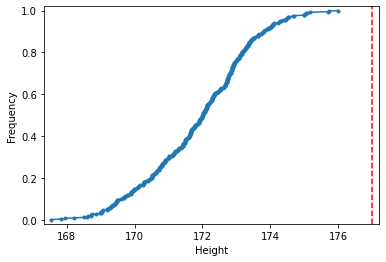

In [32]:
plt.plot(x, y, marker = '.', linestyle = None)
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.axvline(value3, color='r', linestyle='--')
plt.margins(0.02)
plt.show()

Q14: Turning this question around — suppose we randomly pick one person and measure their height and find they are 2.00 m tall. How surprised should we be at this result, given what we know about the population distribution? In other words, how likely would it be to obtain a value at least as extreme as this? Express this as a probability.

In [33]:
value_count = np.count_nonzero(daily_sample_10 >= 200)

In [34]:
pvalue = value_count/len(daily_sample_10)

In [35]:
pvalue

0.0

In [36]:
'''According to our model, it would be very surprising to find someone with 2.00 m tall because we got that the
tallest person according to our distribtion is 176 cm. Therefore, it is very unlikely and extreme to find 
someone with 2.00 meters tall'''

'According to our model, it would be very surprising to find someone with 2.00 m tall because we got that the\ntallest person according to our distribtion is 176 cm. Therefore, it is very unlikely and extreme to find \nsomeone with 2.00 meters tall'

Q15: Let's now start from the position of knowing nothing about the heights of people in our town.

-Use the random seed of 47, to randomly sample the heights of 50 townsfolk

-Estimate the population mean using np.mean

-Estimate the population standard deviation using np.std (remember which denominator to use!)

-Calculate the (95%) margin of error (use the exact critial z value to 2 decimal places - look this up or use norm.ppf()) Recall that the margin of error is mentioned on p. 189 of the AoS and discussed in depth in that chapter).

-Calculate the 95% Confidence Interval of the mean (confidence intervals are defined on p. 385 of AoS)

-Does this interval include the true population mean?

In [37]:
seed(47)
# take your sample now
sample_heights = townsfolk_sampler(50)

In [38]:
#Calculation of the mean
mean2 = np.mean(sample_heights)
print('The mean of this sample is:', mean2)

The mean of this sample is: 172.7815108576788


In [39]:
#Calculation of the standard deviation
std2 = np.std(sample_heights, ddof = 1)
print('The standard deviation is:', std2)

The standard deviation is: 4.195424364433547


In [40]:
#Calculation of the 95% margin using Z-score
upper = mean2 + (2*std2)
lower = mean2 - (2*std2)
print('The 95% margin would be', lower, 'and', upper)

The 95% margin would be 164.3906621288117 and 181.1723595865459


In [41]:
#Calculation of the confidence interval
confidence_interval = np.percentile(sample_heights, [2.5, 97.5])
print('The confidence interval is:', confidence_interval)

The confidence interval is: [165.16148253 179.62603587]


In [42]:
#Is it include the true population mean?
print('Yes, it includes the true population mean')

Yes, it includes the true population mean


Q16: Above, we calculated the confidence interval using the critical z value. What is the problem with this? What requirement, or requirements, are we (strictly) failing?

In [43]:
'''It does not work out if we are talking about a not normal distribution'''

'It does not work out if we are talking about a not normal distribution'

Q17: Calculate the 95% confidence interval for the mean using the t distribution. Is this wider or narrower than that based on the normal distribution above? If you're unsure, you may find this resource useful. For calculating the critical value, remember how you could calculate this for the normal distribution using norm.ppf().

In [44]:
upper_border = norm.ppf(0.975, loc=mean2, scale=std2) 
lower_border = norm.ppf(0.25, loc=mean2, scale=std2)
print('The 95% interval would be:', lower_border, 'and', upper_border)

The 95% interval would be: 169.95174012614547 and 181.0043915118304
